In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", header=0)

# clean up data
df.columns = ["grade1","grade2","label"]

x = df["label"].map(lambda x: float(x.rstrip(';')))
X = df[["grade1" , "grade2"]]
X = np.array(X)

Y = df["label"].map(lambda x:float(x.rstrip(';')))
Y = np.array(Y)

In [3]:
print("X shape : {}\nY shape : {}".format(X.shape, Y.shape))
pos = np.where(Y==1)
neg = np.where(Y==0)

X shape : (100, 2)
Y shape : (100,)


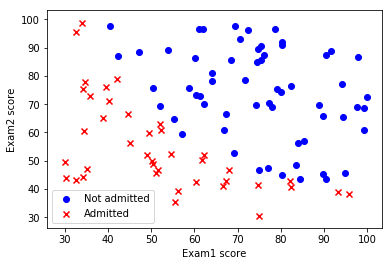

In [4]:
plt.scatter(X[pos,0],X[pos,1],marker='o' , c='b')
plt.scatter(X[neg,0] , X[neg,1],marker ='x',c='r')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend(['Not admitted' , 'Admitted'])
ex11, ex12, ex21, ex22 = plt.axis()
plt.show()

In [5]:
# least squares

m=len(X)

bias = np.ones((m,1))
X=np.concatenate((bias,X),axis=1)
beta = np.dot(np.linalg.inv(X.T @ X), X.T @ Y)

In [6]:
beta
X = X[:,1:]

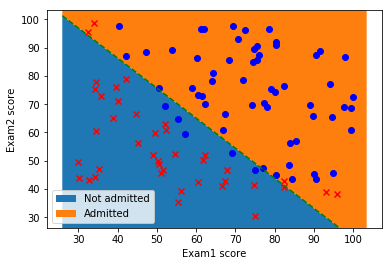

In [29]:
x1 = np.linspace(ex11, ex12, 100)
y2 = (0.5 - beta[0] - x1*beta[1]) / beta[2]
plt.ylim(ex21,ex22)
plt.fill_between(x1,y2)
plt.fill_between(x1, y2, ex22)
plt.scatter(X[pos,0],X[pos,1],marker='o' , c='b')
plt.scatter(X[neg,0] , X[neg,1],marker ='x',c='r')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend(['Not admitted' , 'Admitted'])
plt.plot(x1, y2, '--g')

plt.show()